In [1]:
import pandas as pd
import json
import csv, sys
import os
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


#read data filename
root = 'C:/Users/rc12345/Traffic Champaign/Projects/GPSData/'
filename = 'CHAMP_APR2017.csv'
full_path = os.path.join(root, filename)

flowApril = pd.read_csv(full_path, names=['Date', 'Latitude', 'Longitude', 'Speed','TruckID'], low_memory=False, skiprows=1)

flowApril.head(10)


,Date,Latitude,Longitude,Speed,TruckID
0,2017-04-25 05:24:51,40.104645,-87.667816,61,19097792
1,2017-04-25 05:26:52,40.118729,-87.700134,59,19097792
2,2017-04-25 05:33:53,40.124886,-87.829102,63,19097792
3,2017-04-25 05:35:47,40.124340,-87.866600,63,19097792
4,2017-04-25 05:40:32,40.120026,-87.960075,63,19097792
5,2017-04-25 05:36:44,40.124111,-87.885384,63,19097792
6,2017-04-25 05:37:41,40.123859,-87.904175,62,19097792
7,2017-04-25 05:38:38,40.122726,-87.922859,63,19097792
8,2017-04-25 05:39:35,40.120197,-87.941307,63,19097792
9,2017-04-25 05:53:01,40.134502,-88.198486,57,19097792


In [2]:
#use the .info method to look at some information of our data
flowApril.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534282 entries, 0 to 6534281
Data columns (total 5 columns):
Date         object
Latitude     float64
Longitude    float64
Speed        int64
TruckID      object
dtypes: float64(2), int64(1), object(2)
memory usage: 249.3+ MB


You can drop rows that have any missing values, drop any duplicate rows and build a pairplot of the DataFrame using seaborn in order to get a visual sense of the data. You'll color the data by the 'rating' column. Check out the plots and see what information you can get from them.

In [4]:
#drop rows with missing values and drop duplicates
flowApril.dropna(inplace=True)

flowApril.drop_duplicates(inplace=True)

#transform Date data to datetime
flowApril['Date'] = pd.to_datetime(flowApril['Date'])
#add a colukn with weekday name DayWeek
flowApril['Day of Week'] = flowApril['Date'].dt.weekday_name
#clean_flowApril = clean_flowApril.groupby(['DayWeek'])
flowApril.head(5)


,Date,Latitude,Longitude,Speed,TruckID,Day of Week
0,2017-04-25 05:24:51,40.104645,-87.667816,61,19097792,Tuesday
1,2017-04-25 05:26:52,40.118729,-87.700134,59,19097792,Tuesday
2,2017-04-25 05:33:53,40.124886,-87.829102,63,19097792,Tuesday
3,2017-04-25 05:35:47,40.124340,-87.866600,63,19097792,Tuesday
4,2017-04-25 05:40:32,40.120026,-87.960075,63,19097792,Tuesday


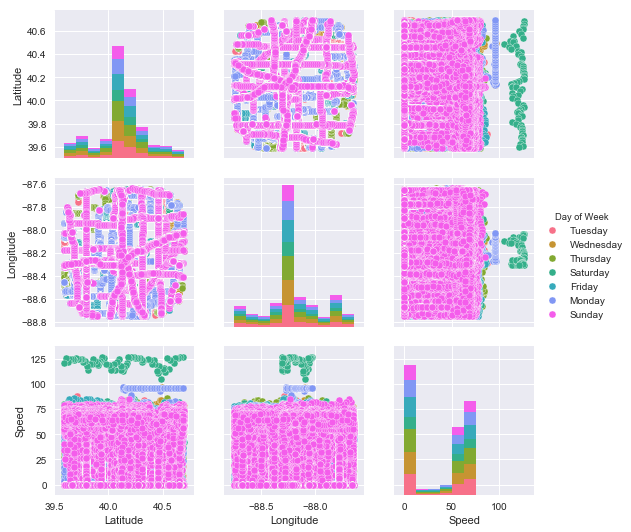

In [5]:
sns.pairplot(flowApril, hue='Day of Week')

In [6]:
flowApril.describe()


,Latitude,Longitude,Speed
count,6.322468e+06,6.322468e+06,6.322468e+06
mean,4.012594e+01,-8.821465e+01,3.545698e+01
std,2.107222e-01,2.454779e-01,3.060768e+01
min,3.958982e+01,-8.875259e+01,0.000000e+00
25%,4.009468e+01,-8.830370e+01,0.000000e+00
50%,4.012607e+01,-8.826449e+01,5.400000e+01
75%,4.021324e+01,-8.810167e+01,6.400000e+01
max,4.068991e+01,-8.763954e+01,1.270000e+02
